In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''
# https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset
Anonymous Customer ID
Call Failures: number of call failures
Complains: binary (0: No complaint, 1: complaint)
Subscription Length: total months of subscription
Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)
Seconds of Use: total seconds of calls
Frequency of use: total number of calls
Frequency of SMS: total number of text messages
Distinct Called Numbers: total number of distinct phone calls
Age Group: ordinal attribute (1: younger age, 5: older age)
Tariff Plan: binary (1: Pay as you go, 2: contractual)
Status: binary (1: active, 2: non-active)
Churn: binary (1: churn, 0: non-churn) - Class label
Customer Value: The calculated value of customer
'''

In [71]:
df = pd.read_csv('Churn.csv')

In [72]:
# make all column names lowercase
df.columns = map(str.lower, df.columns)
df.columns

Index(['call  failure', 'complains', 'subscription  length', 'charge  amount',
       'seconds of use', 'frequency of use', 'frequency of sms',
       'distinct called numbers', 'age group', 'tariff plan', 'status', 'age',
       'customer value', 'fn', 'fp', 'churn'],
      dtype='object')

In [73]:
df.head(10)

,call failure,complains,subscription length,charge amount,seconds of use,frequency of use,frequency of sms,distinct called numbers,age group,tariff plan,status,age,customer value,fn,fp,churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,254.0520,78.2280,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.960,1112.3640,173.5960,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,850.8960,144.5440,0
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,501.9120,105.7680,0
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,172.7280,69.1920,0


In [74]:
df.describe()

,call failure,complains,subscription length,charge amount,seconds of use,frequency of use,frequency of sms,distinct called numbers,age group,tariff plan,status,age,customer value,fn,fp,churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,423.875624,98.304688,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,465.313890,50.724492,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,60.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,102.421125,61.380125,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,205.632000,72.848000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,709.549875,128.838875,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1948.752000,266.528000,1.000000


In [75]:
df.shape

(3150, 16)

In [76]:
df.columns.values

array(['call  failure', 'complains', 'subscription  length',
       'charge  amount', 'seconds of use', 'frequency of use',
       'frequency of sms', 'distinct called numbers', 'age group',
       'tariff plan', 'status', 'age', 'customer value', 'fn', 'fp',
       'churn'], dtype=object)

In [110]:
df.rename(columns = {'subscription  length':'subscription length',
                    'call  failure': 'call failure',
                    'charge  amount': 'charge amount'}, inplace = True)


In [92]:
df.dtypes

call  failure                int64
complains                    int64
subscription length          int64
charge  amount               int64
seconds of use               int64
frequency of use             int64
frequency of sms             int64
distinct called numbers      int64
age group                    int64
tariff plan                  int64
status                       int64
age                          int64
customer value             float64
fn                         float64
fp                         float64
churn                        int64
dtype: object

In [93]:
#Print number of rows in DF
print(f"Rows: {df.shape[0]} \n")
#Print number of features in DF
print(f"Features: {df.shape[1]} \n")
#Print total number of missing values
print(f"Missing Values: {df.isnull().values.sum()} \n")
#Print number of unique values per feature location
print(f"Unique Values: {df.nunique()} \n")

Rows: 3150 

Features: 16 

Missing Values: 0 

Unique Values: call  failure                37
complains                     2
subscription length          45
charge  amount               11
seconds of use             1756
frequency of use            242
frequency of sms            405
distinct called numbers      92
age group                     5
tariff plan                   2
status                        2
age                           5
customer value             2654
fn                         2654
fp                         2195
churn                         2
dtype: int64 



In [94]:
df['churn'].value_counts()

0    2655
1     495
Name: churn, dtype: int64

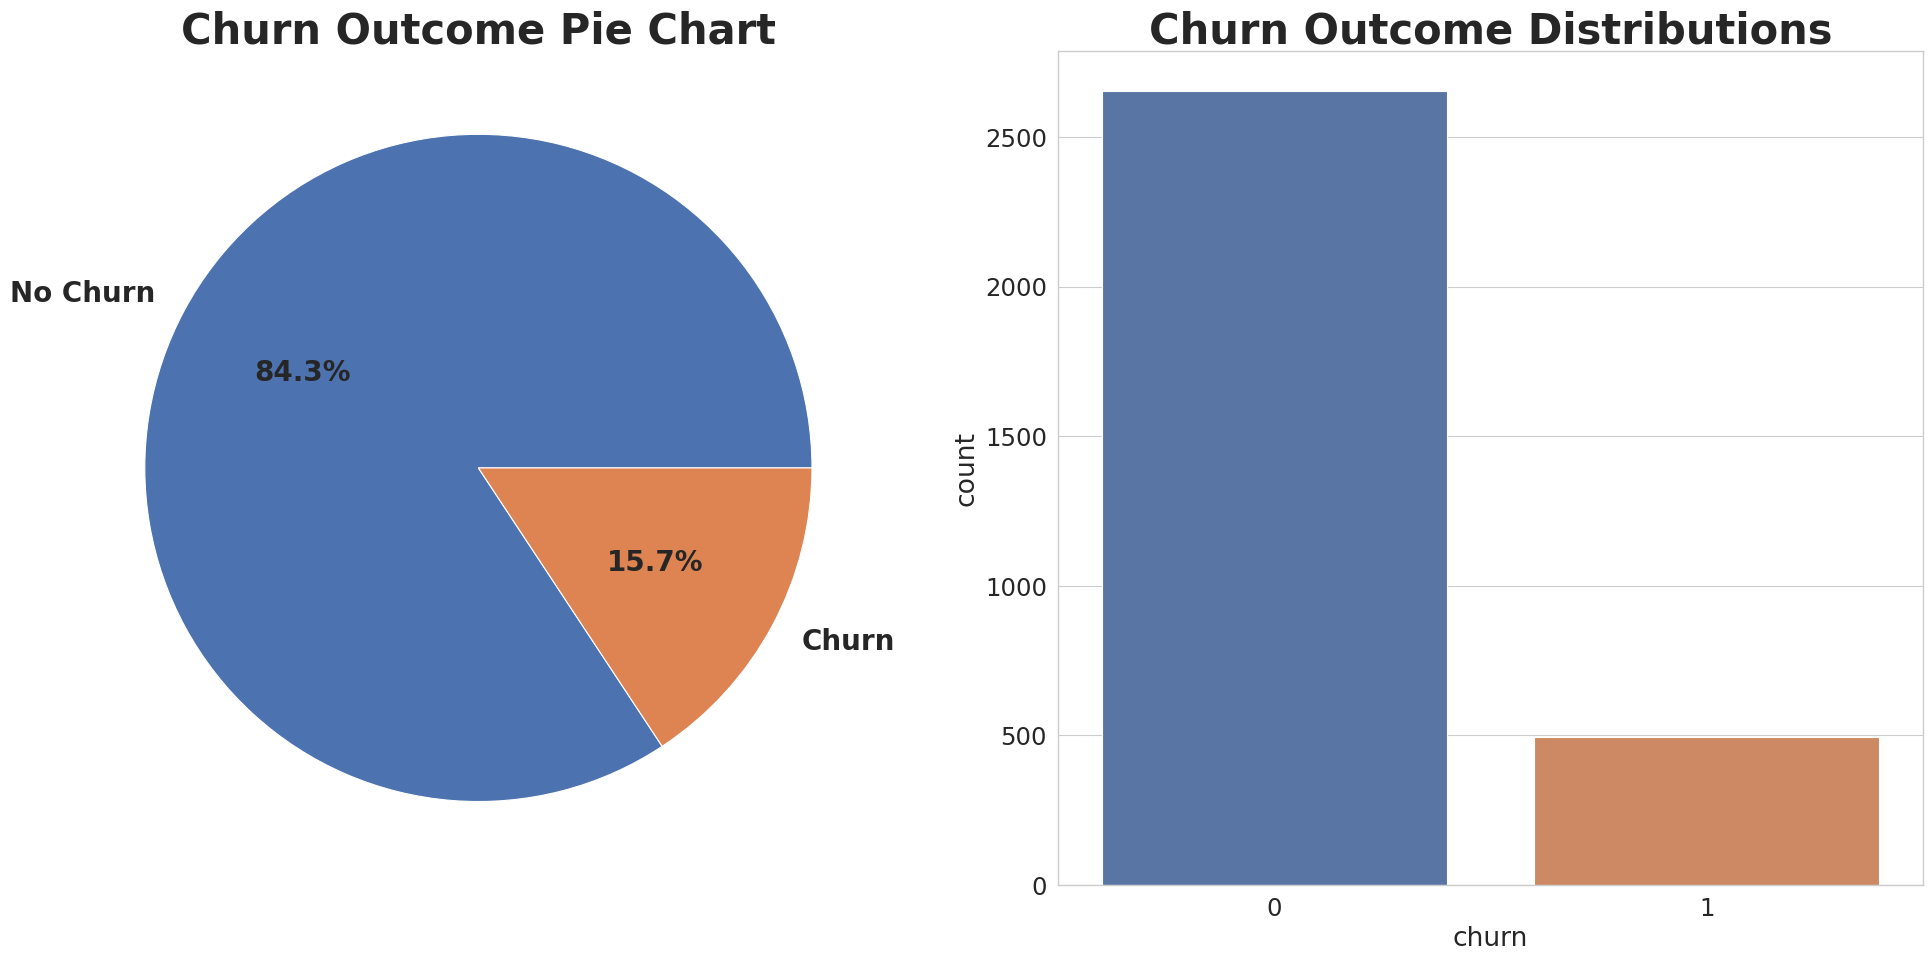

In [95]:
# sns.set(style = 'whitegrid')
# sns.set_context('paper', font_scale = 2)
fig = plt.figure(figsize = (20, 10))

plt.subplot(121)
plt.pie(df.churn.value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
plt.title('Churn Outcome Pie Chart', fontsize = 30, fontweight = 'bold')

plt.subplot(122)
sns.countplot(x=df["churn"])
t.set_xlabel('Churn', fontweight = 'bold', fontsize = 20)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
plt.title('Churn Outcome Distributions', fontsize = 30, fontweight = 'bold')

plt.tight_layout()

In [96]:
def plot_kde(df, feature):
    plt.figure(figsize = (15, 5))
    plt.title(f"KDE Plot: {feature}", fontsize = 30, fontweight = 'bold')
    ax = sns.kdeplot(df[df.churn == 'No'][feature].dropna(), label = 'No Churn', lw = 2, legend = True)
    plt.legend = True
    ax1 = sns.kdeplot(df[df.churn == 'Yes'][feature].dropna(), label = 'Churn', lw = 2, legend = True)
    
    if feature == 'tenure':
        plt.xlabel('Tenure Length (Months)', fontsize = 20, fontweight = 'bold')
    else:
        plt.xlabel('Charge Amount ($)', fontsize = 20, fontweight = 'bold')
    plt.tight_layout()

In [132]:
def plot_kde(df, feature):
#     feature = 'subscription length'
    plt.figure(figsize = (15, 5))
    plt.title(f"KDE Plot: {feature}", fontsize = 30, fontweight = 'bold')
    ax = sns.kdeplot(df[df.churn == 0][feature].dropna(), label = 'No Churn', 
                     lw = 2, legend = True)
    ax1 = sns.kdeplot(df[df.churn == 1][feature].dropna(), label = 'Churn', 
                      lw = 2, legend = True)
    plt.legend = True
    
    plt.tight_layout()

In [133]:
print(f"Unique Values: \n{df.nunique()} \n")

Unique Values: 
call failure                 37
complains                     2
subscription length          45
charge amount                11
seconds of use             1756
frequency of use            242
frequency of sms            405
distinct called numbers      92
age group                     5
tariff plan                   2
status                        2
age                           5
customer value             2654
fn                         2654
fp                         2195
churn                         2
dtype: int64 



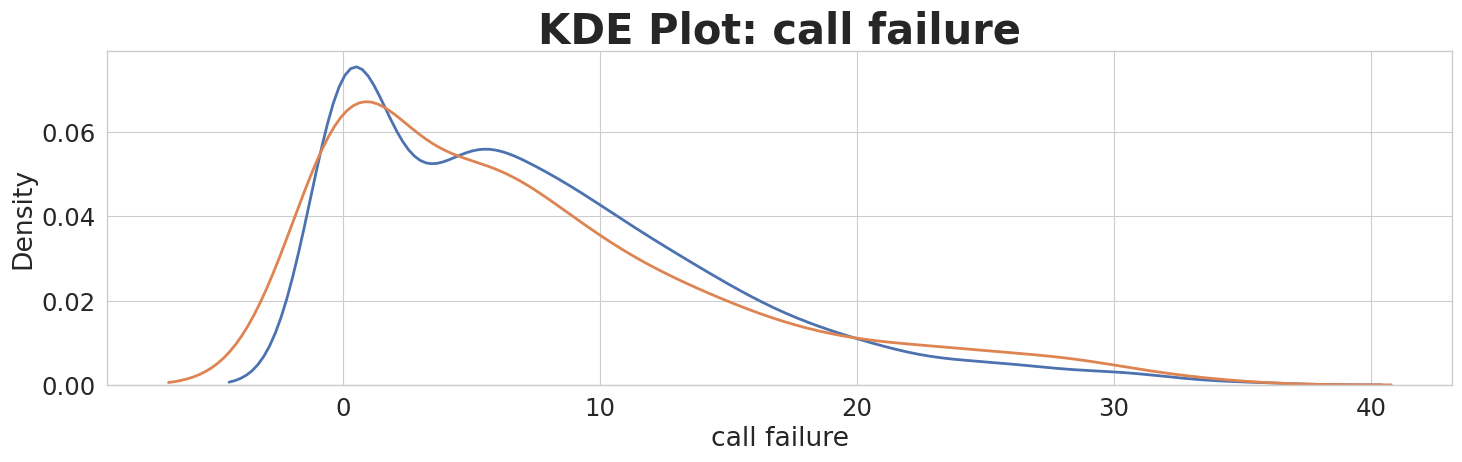

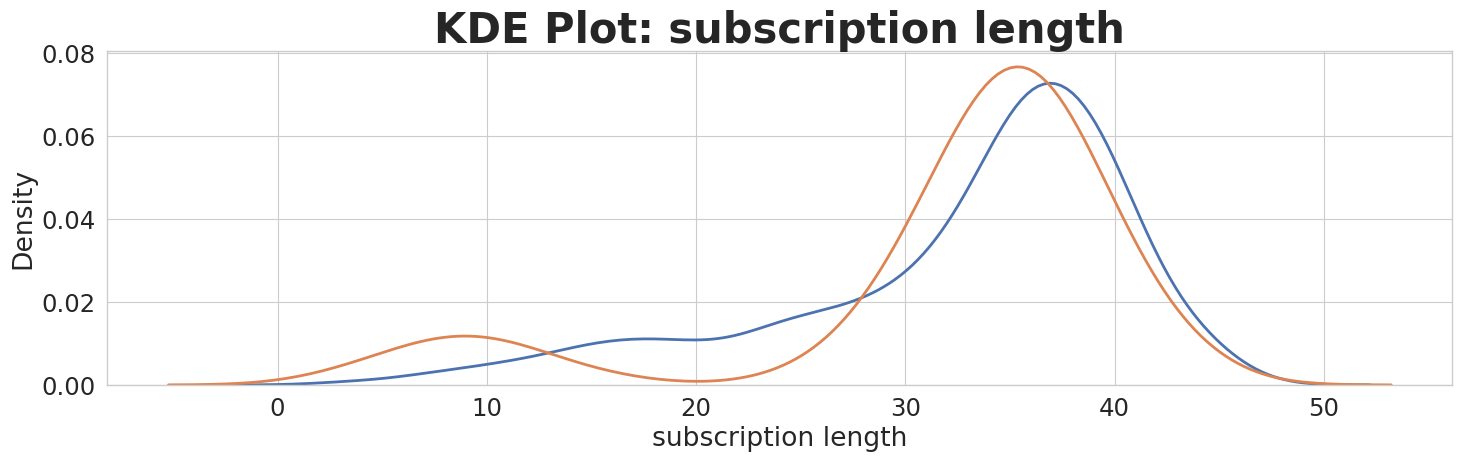

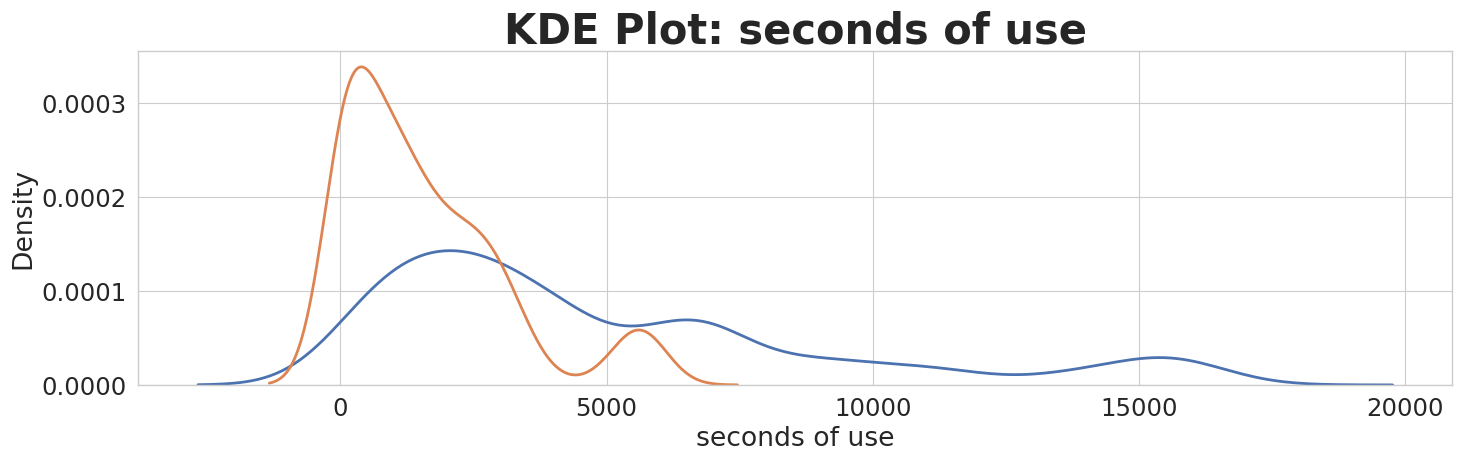

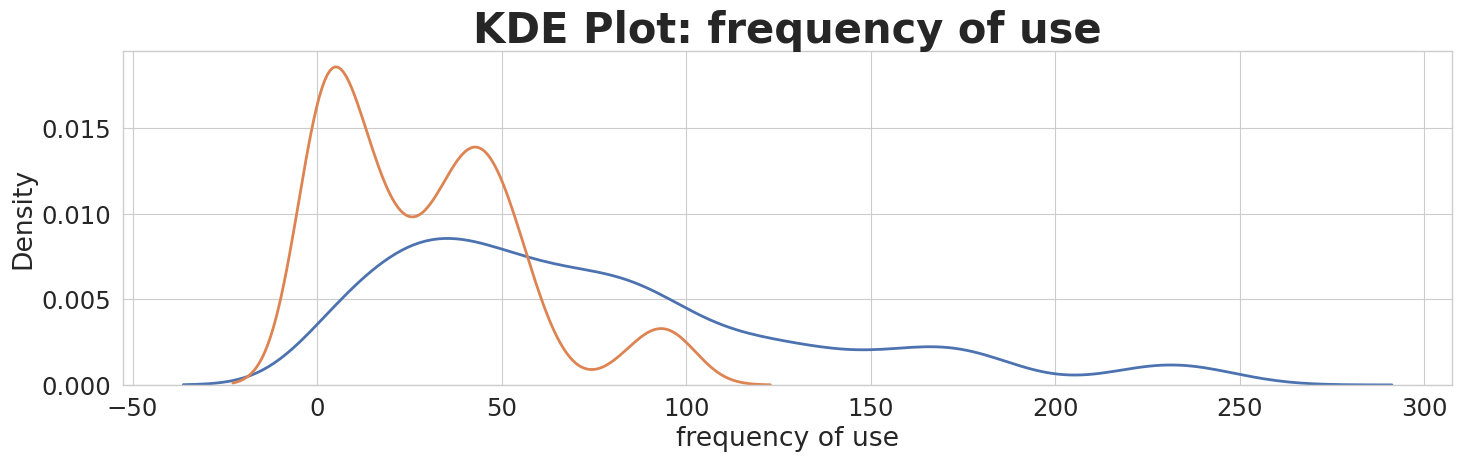

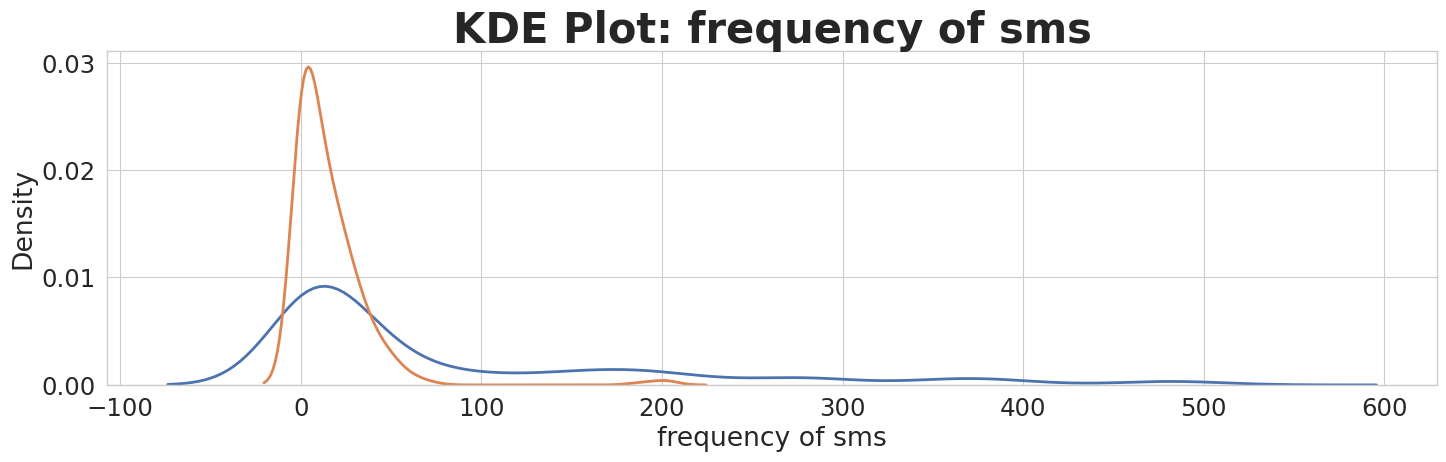

In [134]:
plot_kde(df, 'call failure')
plot_kde(df, 'subscription length')
plot_kde(df, 'seconds of use')
plot_kde(df, 'frequency of use')
plot_kde(df, 'frequency of sms')



In [138]:
df['charge amount'].value_counts()

0     1768
1      617
2      395
3      199
4       76
5       30
8       19
9       14
7       14
6       11
10       7
Name: charge amount, dtype: int64

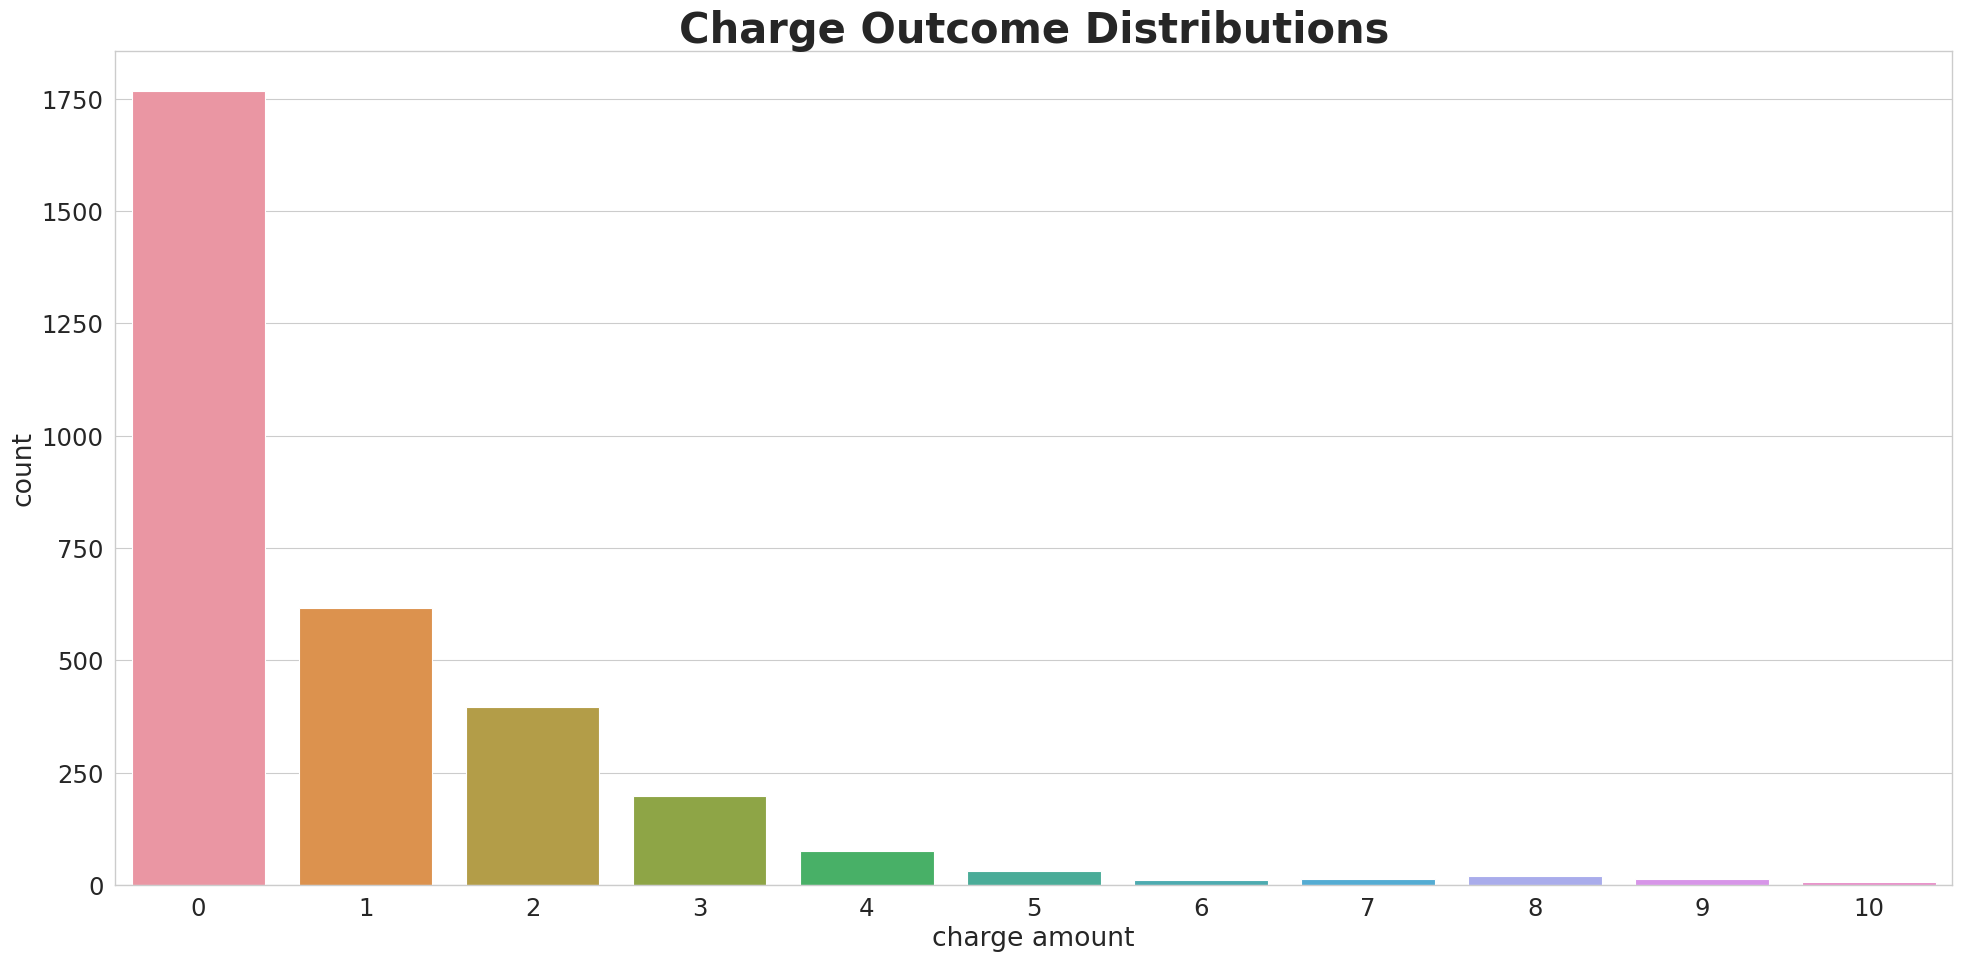

In [142]:
fig = plt.figure(figsize = (20, 10))
sns.countplot(x=df['charge amount'])
t.set_xlabel('Churn', fontweight = 'bold', fontsize = 20)
t.set_ylabel('Charge', fontweight = 'bold', fontsize = 20)
plt.title('Charge Outcome Distributions', fontsize = 30, fontweight = 'bold')

plt.tight_layout()

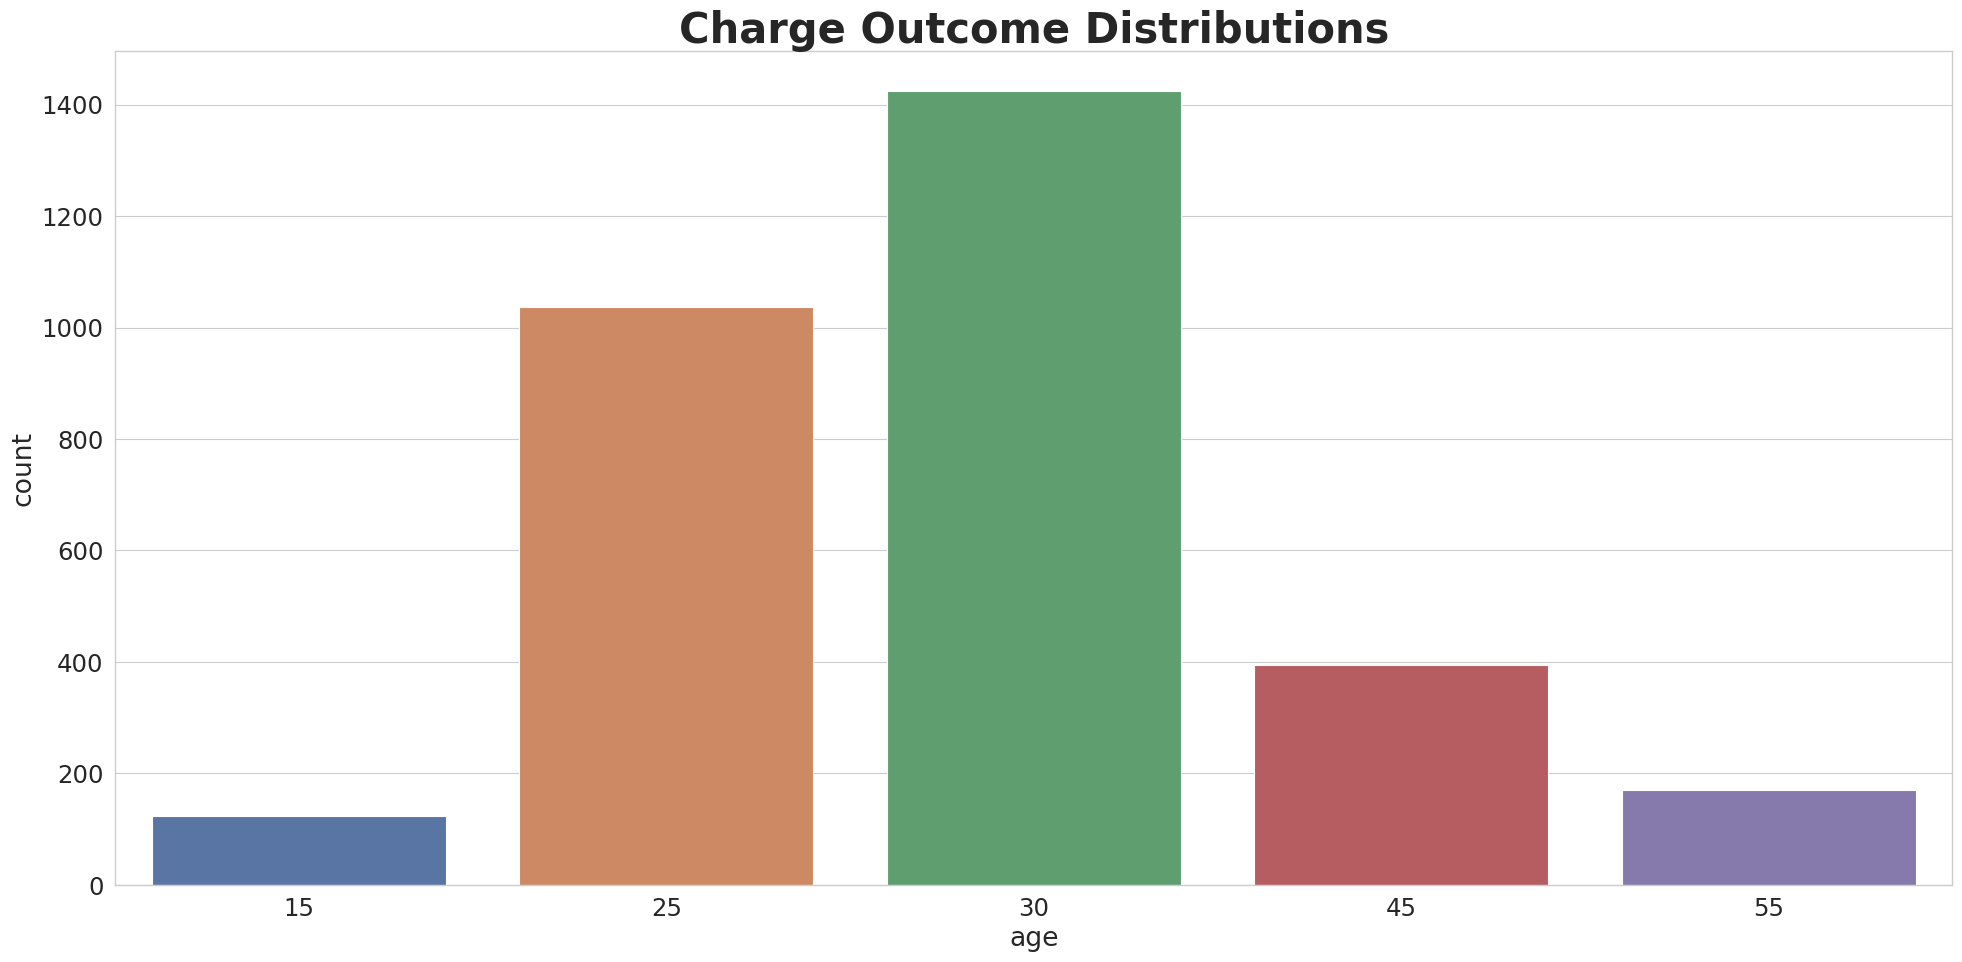

In [143]:
fig = plt.figure(figsize = (20, 10))
sns.countplot(x=df['age'])
t.set_xlabel('Churn', fontweight = 'bold', fontsize = 20)
t.set_ylabel('Charge', fontweight = 'bold', fontsize = 20)
plt.title('Charge Outcome Distributions', fontsize = 30, fontweight = 'bold')

plt.tight_layout()

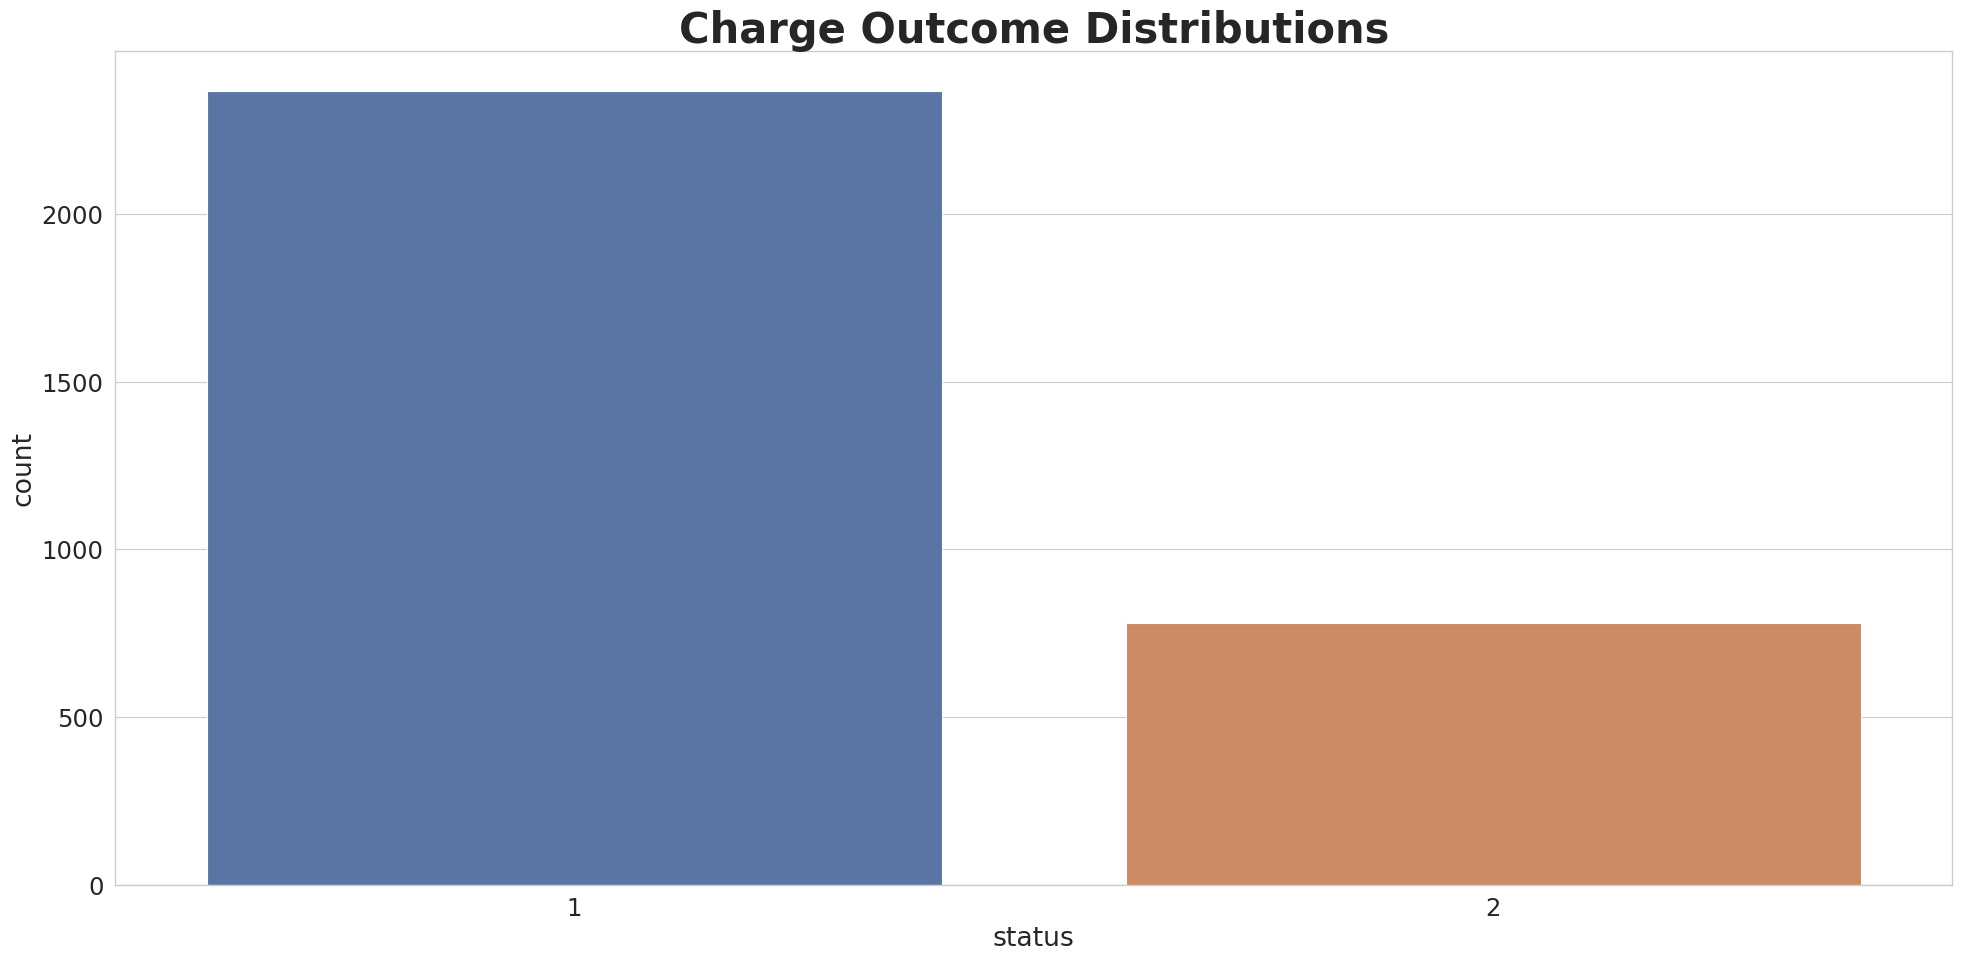

In [145]:
fig = plt.figure(figsize = (20, 10))
sns.countplot(x=df['status'])
t.set_xlabel('Churn', fontweight = 'bold', fontsize = 20)
t.set_ylabel('Charge', fontweight = 'bold', fontsize = 20)
plt.title('Charge Outcome Distributions', fontsize = 30, fontweight = 'bold')

plt.tight_layout()